In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston

In [2]:
# raw_boston = load_boston()

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
data.shape, target.shape

((506, 13), (506,))

In [5]:
u = np.mean(data, axis = 0)
std = np.std(data, axis = 0)

data = (data - u)/std

In [6]:
std

array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
       1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
       8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
       7.13400164e+00])

In [7]:
ones = np.ones((data.shape[0], 1))
data = np.hstack((ones, data))

In [8]:
print(data.shape)

(506, 14)


In [9]:
split = 0.8
train_X = data[:int(split * data.shape[0]), :]
train_Y = target[:int(split * data.shape[0]), ]

test_X = data[int(split * data.shape[0]):, :]
test_Y = target[int(split * data.shape[0]):, ]

In [10]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(404, 14) (102, 14) (404,) (102,)


In [11]:
def hypothesis(X, weight):
    pred = 0
    for i in range(X.shape[0]):
        pred += weight[i] * X[i]
    return pred

In [12]:
def loss(X, Y, weight):
    error = 0
    
    for i in range(X.shape[0]):
        y_p = hypothesis(X[i], weight)
        
        error += (y_p - Y[i])**2
    return error/X.shape[0]

In [13]:
def gradient(X, Y, weight):
    grad = np.zeros((X.shape[1], 1))
    
    for j in range(X.shape[1]):
        for i in range(X.shape[0]):
            y_p = hypothesis(X[i], weight)
            
            grad[j] += (y_p - Y[i]) * X[i, j]
            
    return grad/X.shape[0]

In [20]:
def gradient_descent(X, Y):
    weight = np.zeros((X.shape[1], 1))
    
    epochs = 1000
    lr_rate = 0.03
    cost = []
    
    for i in range(epochs):
        cost.append(loss(X, Y, weight))
        grad = gradient(X, Y, weight)
        print(f'On:{i}', end = '\r')
        for j in range(X.shape[1]):
            weight[j] = weight[j] - lr_rate * grad[j]
        
    return weight, cost

In [21]:
weight, cost_epoch = gradient_descent(train_X, train_Y)

In [22]:
cost_epoch

[array([670.02094059]),
 array([590.58158777]),
 array([527.87577018]),
 array([477.3689365]),
 array([435.85493377]),
 array([401.05839892]),
 array([371.3568714]),
 array([345.5865171]),
 array([322.90625077]),
 array([302.70265163]),
 array([284.52337907]),
 array([268.03050368]),
 array([252.96775868]),
 array([239.13752462]),
 array([226.38462286]),
 array([214.58487474]),
 array([203.63699899]),
 array([193.45684988]),
 array([183.97329853]),
 array([175.12526991]),
 array([166.85959417]),
 array([159.12943338]),
 array([151.89311636]),
 array([145.11326405]),
 array([138.75612308]),
 array([132.79104932]),
 array([127.19010062]),
 array([121.92770959]),
 array([116.98041605]),
 array([112.32664432]),
 array([107.94651487]),
 array([103.82168274]),
 array([99.93519707]),
 array([96.2713778]),
 array([92.81570636]),
 array([89.55472805]),
 array([86.47596435]),
 array([83.56783384]),
 array([80.81958042]),
 array([78.22120816]),
 array([75.76342188]),
 array([73.4375729]),
 array(

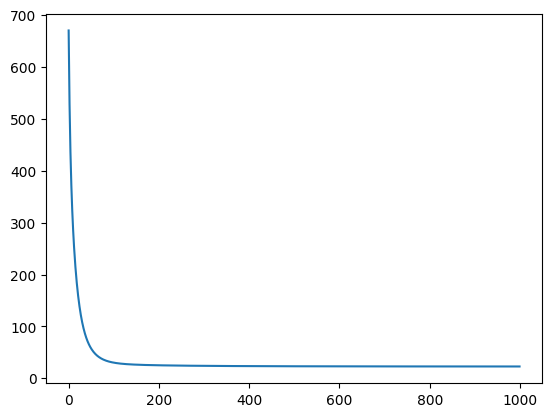

In [23]:
plt.plot(cost_epoch)

In [24]:
def hypothesis(X, weight):
    return np.dot(X, weight)

In [27]:
def loss(X, Y, weight):
    y_p = hypothesis(X, weight)
        
    error = np.sum((y_p - Y)**2)
    return error/X.shape[0]

In [26]:
np.dot?

In [30]:
def gradient(X, Y, weight):
    y_p = hypothesis(X, weight)
    grad = np.dot(X.T, (y_p - Y))
    return grad/X.shape[0]

In [31]:
def gradient_descent(X, Y):
    weight = np.zeros((X.shape[1], 1))
    
    epochs = 1000
    lr_rate = 0.03
    cost = []
    
    for i in range(epochs):
        cost.append(loss(X, Y, weight))
        grad = gradient(X, Y, weight)
        print(f'On:{i}', end = '\r')
        weight = weight - lr_rate * grad
        
    return weight, cost

In [32]:
weight, cost_epoch = gradient_descent(train_X, train_Y)

In [33]:
cost_epoch

[270688.46,
 246436.13831889504,
 225996.11370372845,
 208453.39578853667,
 193152.18193270022,
 179618.91657096412,
 167508.4716158257,
 156566.4776085157,
 146602.9384578965,
 137473.73102109015,
 129067.61603920914,
 121297.10279805123,
 114092.00971929012,
 107394.91209979281,
 101157.91192447637,
 95340.33486215779,
 89907.07840274829,
 84827.41809961222,
 80074.13685906408,
 75622.88272154005,
 71451.688878544,
 67540.60944738812,
 63871.438352402794,
 60427.488331390545,
 57193.413852799145,
 54155.066467422716,
 51299.37443944515,
 48614.24083202918,
 46088.45586043337,
 43711.62047895619,
 41474.07898226039,
 39366.858978404205,
 37381.61750118663,
 35510.592322822085,
 33746.55773919162,
 32082.784253246686,
 30513.001694559865,
 29031.36539642785,
 27632.42511468486,
 26311.09642034179,
 25062.63433545296,
 23882.60901113567,
 22766.88327048588,
 21711.591858704684,
 20713.12225911715,
 19768.09694767327,
 18873.356970511577,
 18025.94673963124,
 17223.099950950207,
 16462.2

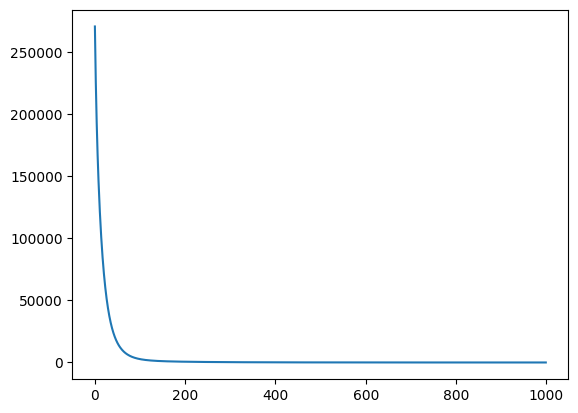

In [34]:
plt.plot(cost_epoch)